# Breast Cancer Analysis - ML Project

# Govind Satwani - 1BM18IS037 - Vth-A

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
data=pd.read_csv(r'C:\Users\Govind Satwani\Downloads\breast-cancer.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [5]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
data.shape

(569, 33)

In [8]:
df = pd.DataFrame(data.dropna(axis =1))
df.shape

(569, 32)

In [9]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
count = df['diagnosis'].value_counts()
print(count)

B    357
M    212
Name: diagnosis, dtype: int64


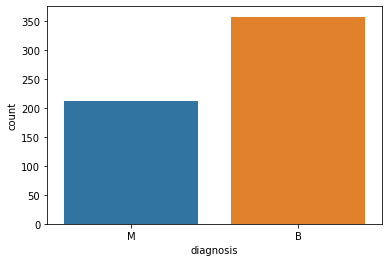

In [11]:
import seaborn as sns
sns.countplot(x='diagnosis',label='count', data=df)
plt.show()

In [12]:
X = df.iloc[:,2:32]
Y = df.iloc[:,1]

In [13]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [14]:
Y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [17]:
print("\n\n")
print("Training data set\n",X_train,"\n\n\n",Y_train)
print("\n\n")
print("Testing data set\n",X_test)




Training data set
 [[-0.64678318 -0.42577149 -0.67671518 ... -0.35335182  0.32395133
  -0.76893975]
 [-0.82571213  0.13272462 -0.8249999  ... -1.43718102  0.63294742
  -1.03770647]
 [ 1.70485436  2.08513394  1.61593137 ...  0.73382724 -0.53185462
  -0.97397828]
 ...
 [-1.33239345 -0.22564372 -1.32422512 ... -0.97581512 -0.72275273
  -0.14329518]
 [-1.25173342 -0.24891439 -1.28674204 ... -1.74506282 -1.60444316
  -1.01720262]
 [-0.74334801  1.07984094 -0.71872918 ... -0.27523937 -1.2760337
   0.1869831 ]] 


 293    B
332    B
565    M
278    B
489    M
      ..
277    M
9      M
359    B
192    B
559    B
Name: diagnosis, Length: 426, dtype: object



Testing data set
 [[-0.20656118  0.28631105 -0.13712355 ...  1.37791231  1.10695714
   1.49368807]
 [-0.26052388  1.3870138  -0.32412706 ... -0.83070565 -0.73893053
  -0.89030039]
 [-0.03047238 -0.84464357 -0.09799286 ... -0.49404558 -1.23720696
  -0.93352473]
 ...
 [-0.50761623 -1.63351933 -0.53666849 ... -0.1158169   0.33851135
  -0.

# Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [19]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)

In [20]:
y_pred = clf.predict(X_test)

In [21]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred)*100)

Accuracy: 89.5104895104895


In [22]:
cm2 = confusion_matrix(Y_test, y_pred)
print("Precision:\n")
def precision(cm2):
    p1 = (cm2[1][1]/((cm2[1][1])+(cm2[0][1])))
    if (str(p1) == 'nan'):
        print("Precision M – ","0.00")
    else:
        print("Precision M – ",round(p1*100,2))
precision(cm2)
    
def precision1(cm2):
    p = (cm2[0][0]/((cm2[0][0])+(cm2[1][0])))
    if (str(p) == 'nan'):
        print("Precision B – ","0.00")
    else:
        print("Precision B – ",round(p*100,2))
precision1(cm2)

Precision:

Precision M –  80.65
Precision B –  96.3


In [23]:
print("\n")
print("Recall:\n")

def recall(cm):
    p1 = (cm[1][1]/((cm[1][1])+(cm[1][0])))
    
    if (str(p1) == 'nan'):
        print("Recall M – ","0.00")
    else:
        print("Recall M – ",round(p1*100,2))
recall(cm2)

def recall1(cm):
    p = (cm[0][0]/((cm[0][0])+(cm[0][1])))
    
    if (str(p) == 'nan'):
        print("Recall B – ","0.00")
    else:
        print("Recall B – ",round(p*100,2))
recall1(cm2)



Recall:

Recall M –  94.34
Recall B –  86.67


# Random Forest 

In [24]:
from sklearn.ensemble import RandomForestClassifier
RFclassifier = RandomForestClassifier(n_estimators=1000,criterion='entropy',random_state=0)
RFclassifier.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [25]:
Y_pred = RFclassifier.predict(X_test)

In [26]:
print("\n\n")
print("Classification report\n")
print(classification_report(Y_test, Y_pred))
print("\n\n")
print("Confusion matrix\n")
print(confusion_matrix(Y_test, Y_pred))
print("\n\n")
print("Accuracy score")
print(accuracy_score(Y_test, Y_pred)*100)
print("\n")




Classification report

              precision    recall  f1-score   support

           B       0.98      0.99      0.98        90
           M       0.98      0.96      0.97        53

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143




Confusion matrix

[[89  1]
 [ 2 51]]



Accuracy score
97.9020979020979




In [27]:
cm = confusion_matrix(Y_test, Y_pred)
print("Precision:\n")
def precision(cm):
    p1 = (cm[1][1]/((cm[1][1])+(cm[0][1])))
    if (str(p1) == 'nan'):
        print("Precision M – ","0.00")
    else:
        print("Precision M – ",round(p1*100,2))
precision(cm)
    
def precision1(cm):
    p = (cm[0][0]/((cm[0][0])+(cm[1][0])))
    if (str(p) == 'nan'):
        print("Precision B – ","0.00")
    else:
        print("Precision B – ",round(p*100,2))
precision1(cm)


Precision:

Precision M –  98.08
Precision B –  97.8


In [28]:
print("\n")
print("Recall:\n")

def recall(cm):
    p1 = (cm[1][1]/((cm[1][1])+(cm[1][0])))
    
    if (str(p1) == 'nan'):
        print("Recall M – ","0.00")
    else:
        print("Recall M – ",round(p1*100,2))
recall(cm)

def recall1(cm):
    p = (cm[0][0]/((cm[0][0])+(cm[0][1])))
    
    if (str(p) == 'nan'):
        print("Recall B – ","0.00")
    else:
        print("Recall B – ",round(p*100,2))
recall1(cm)




Recall:

Recall M –  96.23
Recall B –  98.89


In [29]:
print("New prediction")
new = [[15.34,14.26,102.5,704.4,0.1073,0.2135,0.2077,0.09756,0.2521,0.07032,0.4388,0.7096,3.384,44.91,0.006789, 0.05328,0.06446,0.02252,0.03672,0.004394,18.07,19.08,125.1,980.9,0.139,0.5954,0.6305,0.2393,0.4667,0.09946]]
new_pred = RFclassifier.predict(new)
print("Prediction for new data point",new_pred)

New prediction
Prediction for new data point ['M']
